<a href="https://colab.research.google.com/github/tanupriya9102/Mental-Health-Employee/blob/main/Mental_Health_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

In [4]:
!pip install nltk

In [5]:
import nltk

In [6]:
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report

In [8]:
from google.colab import files
upload=files.upload()

Saving mental health dataset.xlsx to mental health dataset.xlsx


In [9]:
data= pd.read_excel('mental health dataset.xlsx')

In [10]:
df=pd.DataFrame(data)

**Delete null values**

In [11]:
null_text_count = df['Text'].isnull().sum()
null_text_count

20

In [12]:
index = data[data['Text'].isnull()].index
index

Int64Index([671, 677, 683, 689, 695, 701, 707, 713, 719, 725, 731, 737, 743,
            749, 755, 761, 767, 773, 779, 785],
           dtype='int64')

In [13]:
df.dropna(axis=0, how='any', inplace=True)

In [14]:
null_text_count = df['Text'].isnull().sum()
null_text_count

0

**Remove Duplicates**

In [15]:
# Display the rows with duplicates
duplicates = df[df.duplicated(keep=False)]

print("Exact duplicates:")
print(duplicates)

Exact duplicates:
       Label                                               Text
166   stress                "I feel like I'm running on empty."
177   stress             "I'm anxious about social situations."
196  anxiety      "I avoid situations that trigger my anxiety."
202  anxiety            "I'm afraid of being judged by others."
212  anxiety                    "I'm anxious about the future."
..       ...                                                ...
794  anxiety    My anxiety sometimes keeps me from socializing.
798  anxiety      Sometimes, anxiety makes me feel really down.
799  anxiety  Anxiety often brings a sense of emptiness with...
800  anxiety             I feel hopeless because of my anxiety.
801  anxiety              My anxious thoughts make me feel sad.

[215 rows x 2 columns]


In [16]:
len(df)

783

In [17]:
# Check for exact duplicates and keep the first occurrence
df = df.drop_duplicates(keep='first')
len(df)

670

In [18]:
df['Label'].value_counts()

frustration    184
anxiety        180
depression     179
stress         127
Name: Label, dtype: int64

In [19]:
duplicates = df[df.duplicated(keep=False)]

print("Exact duplicates:")
print(duplicates)

Exact duplicates:
Empty DataFrame
Columns: [Label, Text]
Index: []


**Remove stop words**

In [20]:
# Function to remove stopwords
def remove_stopwords(Text):
    words = nltk.word_tokenize(Text)
    words = [word for word in words if word.lower() not in stopwords.words("english")]
    return " ".join(words)

df['Text'] = df['Text'].apply(remove_stopwords)

df.to_csv("mentaldataset_cleaned.csv", index=False)

In [21]:
df.to_csv("mentaldataset_cleaned.csv",index=False)

In [28]:
df.to_excel("mentaldataset_cleaned.xlsx",index=False)

In [22]:
data=pd.read_csv("mentaldataset_cleaned.csv")

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [24]:
X = tfidf_vectorizer.fit_transform(data['Text'])
y = data['Label']

**Regression**

In [25]:
classifier = LogisticRegression()

In [26]:
classifier.fit(X, y)

LogisticRegression()

In [29]:
questions = [
    "Do I feel sad, empty, or hopeless often?",
"Have I lost interest in the things I used to enjoy?",
"Have I started to avoid spending time with friends and loved ones?",
"Do I worry about things I can’t control to the point where I have a hard time thinking about anything else?",
"Do I become irritable or annoyed more quickly than I have in the past?",
"Do I often feel restless, on edge, or unable to relax?",
"Do I cycle through dark, unwanted, or fearful thoughts I can’t seem to stop?",
"Is it difficult to fall asleep, get enough sleep, or wake up on time most days?",
"Have I noticed unexplained pain, tension, or other physical symptoms?",
"Do these changes affect my daily life or relationships?"
]
user_responses = []
predicted_labels = []

for i, question in enumerate(questions):
    response = input(f"Q{i + 1}: {question} ")
    user_responses.append(response)
    response_tfidf = tfidf_vectorizer.transform([response])
    predicted_label = classifier.predict(response_tfidf)[0]
    predicted_labels.append(predicted_label)
print("Predicted Labels for Each Question:")
for i, label in enumerate(predicted_labels):
    print(f"Q{i + 1}: {label}")



Q1: Do I feel sad, empty, or hopeless often? I don't feel much of anything anymore, including worry.
Q2: Have I lost interest in the things I used to enjoy? I'm fed up of everything
Q3: Have I started to avoid spending time with friends and loved ones? I don't like to go out with anyone
Q4: Do I worry about things I can’t control to the point where I have a hard time thinking about anything else? I worry alot
Q5: Do I become irritable or annoyed more quickly than I have in the past? Yes I feel very irritable
Q6: Do I often feel restless, on edge, or unable to relax? I feel very restless and unable to sleep
Q7: Do I cycle through dark, unwanted, or fearful thoughts I can’t seem to stop? Yes i get strange thoughts 
Q8: Is it difficult to fall asleep, get enough sleep, or wake up on time most days? Yes I find difficult to go to sleep
Q9: Have I noticed unexplained pain, tension, or other physical symptoms? I feel too much pain in my head and tension
Q10: Do these changes affect my daily l

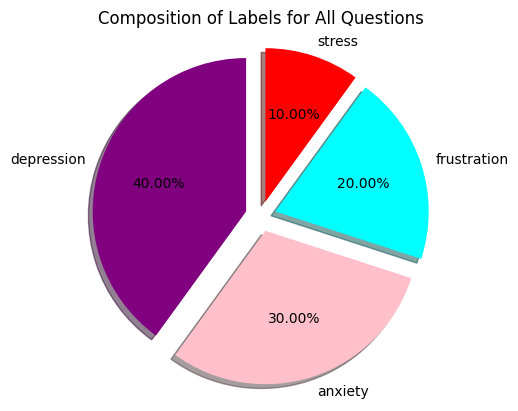

In [30]:
label_counts = pd.Series(predicted_labels).value_counts()
labels = label_counts.index
sizes = label_counts.values
colors=['purple', 'pink', 'cyan','red','blue','brown']
plt.pie(sizes, labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1,)*len(labels), autopct='%1.2f%%')
plt.axis('equal')

plt.title('Composition of Labels for All Questions')
plt.show()